# Cat VS Dogs

# Intro

In this notebook, I will try to classify whether images contain either a dog or a cat, by using Ensemble Learning .<br>
The training archive contains 25,000 images of dogs and cats.<br>


# Loading Libraries

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.image import imread
#import seaborn as sns
#from sklearn.model_selection import train_test_split #to perform the splitting
import os
#import tensorflow as tf
import cv2# library of Python bindings designed to solve computer vision problems.

# <b>Loading dataset</b>

First of all, I opened the train folder and saw that the folder has pictures of both cats and dogs.<br>
Pictures of dogs are kept in the name: "dog.number", and pictures of cats are kept in the name: "cat.number".<br>
The following code will create a list of all the file names in the folder:

In [81]:
TRAIN_DIR = 'C:/Users/yuval/trainCatVSDogs/train/'
#TEST_DIR = '../working/test/test/'

trainCatsAndDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]
#trainDogs_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]

#test_images_filepaths = [TEST_DIR + last_file_name for last_file_name in os.listdir(TEST_DIR)]

#print("Done")

In [82]:
trainCatsAndDogs_images_filepaths

['C:/Users/yuval/trainCatVSDogs/train/cat.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1

After I created a list of all the file names, I want to separate the files contains 'dog' in their name to one list, <br>
and the files contains 'cat' in their name to another list.

In [89]:
#Define two lists of dogs and cats, and check if the file name contain 'dog' or 'cat'
train_dogs_filepaths = [TRAIN_DIR+ dog_file_name for dog_file_name in os.listdir(TRAIN_DIR) if 'dog' in dog_file_name]
train_cats_filepaths = [TRAIN_DIR+ cat_file_name for cat_file_name in os.listdir(TRAIN_DIR) if 'cat' in cat_file_name]


In [84]:
train_cats_filepaths

['C:/Users/yuval/trainCatVSDogs/train/cat.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/cat.1

In [85]:
train_dogs_filepaths

['C:/Users/yuval/trainCatVSDogs/train/dog.0.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.100.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10000.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10002.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10003.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10004.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10005.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10006.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10007.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10008.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10009.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1001.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10010.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.10011.jpg',
 'C:/Users/yuval/trainCatVSDogs/train/dog.1

## Explain about method's parameters<b>

**cv2.imread(path, flag)**:<br>
    
method loads an image from the specified file and read it into a numpy array.<br> 
If the image cannot be read (because of missing file, improper permissions,unsupported or invalid format) then this method returns an empty matrix.<br> 
    
**path**-A string representing the path of the image to be read.<br>
**flag**-It specifies the way in which image should be read.<br>
    It’s default value is cv2.IMREAD_COLOR-to load a color image and cv2.IMREAD_GRAYSCALE to load grey scale image. <br>
    
**plt.imshow(img_array)**:<br>
    
method is used to display an image in a window. The window automatically fits to the image size.<br>
    
**img_array**-array of pixels (as we got from last method).
    

In [100]:
#Lets see how the first picture of dog look like 
test_img_file_path =train_dogs_filepaths[0] #the first element in train_dogs_filepaths array
#Now I will use cv2.imread() method- to loads an image from the specified file. 
img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
img_array #Lets see how the numpu array of the image look like



array([[[124, 113, 115],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [141, 131, 131],
        [139, 131, 131],
        [139, 131, 131]],

       [[125, 114, 116],
        [127, 116, 118],
        [130, 117, 119],
        ...,
        [143, 133, 133],
        [141, 133, 133],
        [141, 133, 133]],

       [[126, 115, 117],
        [128, 117, 119],
        [131, 118, 120],
        ...,
        [145, 135, 135],
        [143, 135, 135],
        [143, 135, 135]],

       ...,

       [[ 77,  73,  68],
        [ 81,  77,  72],
        [ 83,  79,  74],
        ...,
        [ 85,  83,  73],
        [ 84,  82,  72],
        [ 83,  81,  71]],

       [[ 75,  71,  66],
        [ 77,  73,  68],
        [ 77,  73,  68],
        ...,
        [ 77,  75,  65],
        [ 77,  75,  65],
        [ 78,  76,  66]],

       [[ 74,  70,  65],
        [ 75,  71,  66],
        [ 74,  70,  65],
        ...,
        [ 76,  74,  64],
        [ 76,  74,  64],
        [ 76,  74,  64]]

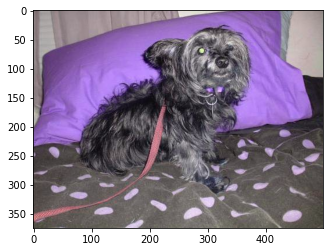

In [101]:
plt.imshow(img_array)#show the image
plt.show() 

In [102]:
#We can see the dimension of the image 
print(img_array.shape)

(375, 499, 3)


According to numpy documentation, the resulting array we got from .shape method will always have this order:(height, width).<br>
For example, referring to the example above- the image is 499 pixel wide, and 375 pixel high.<br>
Each pixel contains 3 bytes (representing the red, green and blue values of the pixel color).<br>
As we learned during current semester, one way to dimensionality reduction is to change the image to grayscale image.<br>
Lets show it:
   

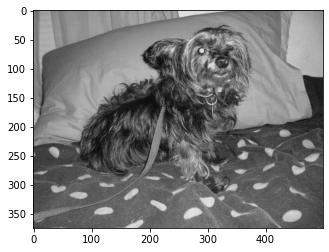

In [105]:
img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array_gray, cmap = "gray")
plt.show()


In [106]:
#Lets see the dimension of the image
print(img_array_gray.shape)

(375, 499)


In [130]:
#Lets see the array itself
#each cell in the array below, represent a roe in the image, and each number in the cell represent a specific pixel in the image
print(img_array_gray)

[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


In [133]:
#Now, I want to represent each image as one row of pixels, by method: .ravel()
print(img_array_gray.ravel())

[115 118 119 ...  71  71  71]


## Resize<b>

All images in the train file , should be at the same size Lets see the size of all images:

In [116]:
#Check the size for Dogs image
Dogs_imSize=[]
i=0
for file in train_dogs_filepaths:
    test_img_file_path =train_dogs_filepaths[i]
    img_array = cv2.imread(test_img_file_path)
    Dogs_imSize.append(img_array.shape)
    i=i+1


In [164]:
print(Dogs_imSize)
print(len(Dogs_imSize))

[(375, 499, 3), (499, 327, 3), (292, 269, 3), (397, 500, 3), (375, 499, 3), (412, 263, 3), (151, 109, 3), (375, 499, 3), (360, 431, 3), (375, 499, 3), (366, 224, 3), (339, 499, 3), (499, 429, 3), (374, 500, 3), (332, 500, 3), (500, 347, 3), (316, 315, 3), (415, 449, 3), (402, 500, 3), (374, 500, 3), (490, 399, 3), (356, 478, 3), (500, 347, 3), (374, 500, 3), (375, 499, 3), (374, 500, 3), (199, 200, 3), (255, 335, 3), (473, 499, 3), (374, 500, 3), (363, 431, 3), (299, 400, 3), (375, 499, 3), (281, 500, 3), (375, 499, 3), (374, 500, 3), (326, 349, 3), (166, 220, 3), (250, 249, 3), (374, 500, 3), (374, 500, 3), (396, 490, 3), (284, 500, 3), (447, 499, 3), (374, 500, 3), (500, 394, 3), (476, 499, 3), (375, 499, 3), (333, 235, 3), (499, 319, 3), (375, 499, 3), (455, 500, 3), (239, 320, 3), (329, 499, 3), (374, 500, 3), (333, 499, 3), (182, 181, 3), (499, 436, 3), (500, 406, 3), (355, 500, 3), (351, 350, 3), (374, 499, 3), (499, 363, 3), (331, 500, 3), (375, 499, 3), (374, 500, 3), (499, 264

In [134]:
#Check the size for Cats image
Cats_imSize=[]
i=0
for file in train_cats_filepaths:
    test_img_file_path =train_cats_filepaths[i]
    img_array = cv2.imread(test_img_file_path)
    Cats_imSize.append(img_array.shape)
    i=i+1


In [165]:
print(Cats_imSize)
print(len(Cats_imSize))

[(374, 500, 3), (280, 300, 3), (499, 489, 3), (499, 403, 3), (149, 150, 3), (359, 431, 3), (374, 500, 3), (471, 499, 3), (375, 499, 3), (239, 320, 3), (177, 319, 3), (320, 460, 3), (300, 219, 3), (374, 500, 3), (500, 472, 3), (499, 336, 3), (386, 499, 3), (448, 357, 3), (166, 250, 3), (374, 500, 3), (500, 372, 3), (339, 500, 3), (198, 179, 3), (280, 500, 3), (454, 499, 3), (301, 246, 3), (407, 379, 3), (423, 320, 3), (417, 423, 3), (448, 500, 3), (336, 349, 3), (431, 325, 3), (251, 153, 3), (491, 400, 3), (332, 500, 3), (134, 180, 3), (500, 385, 3), (269, 259, 3), (462, 500, 3), (374, 500, 3), (120, 159, 3), (374, 500, 3), (390, 500, 3), (391, 356, 3), (263, 300, 3), (276, 434, 3), (300, 299, 3), (500, 360, 3), (375, 499, 3), (375, 499, 3), (440, 500, 3), (480, 319, 3), (406, 500, 3), (273, 378, 3), (374, 500, 3), (336, 373, 3), (500, 451, 3), (384, 385, 3), (422, 231, 3), (333, 500, 3), (469, 450, 3), (450, 432, 3), (500, 345, 3), (400, 299, 3), (390, 499, 3), (403, 499, 3), (299, 248

As we can see, there is no uniform size for all images, therefore I will set global image size for all:

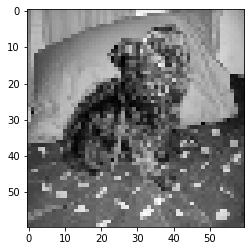

In [137]:
ROW_DIMENSION = 60
COLUMN_DIMENSION = 60
CHANNELS = 1 #For greyscale images put it to 1; put it to 3 if you want color image data

new_array = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION)) #A squarish compression on it's width will take place
plt.imshow(new_array,cmap = 'gray')
plt.show()

with dimension of 60 in row and column, it is not possible to identify even for human which animal appears in the image above,<br>
so I will try another values:

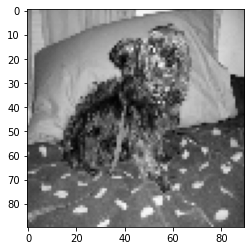

In [151]:
ROW_DIMENSION = 90
COLUMN_DIMENSION = 90
CHANNELS = 1 #For greyscale images put it to 1; put it to 3 if you want color image data

new_array = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION)) #A squarish compression on it's width will take place
plt.imshow(new_array,cmap = 'gray')
plt.show()

# Create df with the pixels of every image in a row

I tried different values as: 70,80,100,110,120,125.<br>
The value I could recognize that there was a dog in the image was: 90.<br>
Now, I will create df that show each image as row of pixels as I already done before for the image above.<br>
First of all, because I chose size 90 * 90, the size of the df should be 8100-1=8099

In [192]:
dfDogs=pd.DataFrame(index=np.arange(12500), columns=np.arange(8100))
dfDogs


,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


i=0
for image intrain_dogs_filepaths:
    test_img_file_path =train_dogs_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
    img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)
    print(img_array_gray.ravel())


In [193]:
#df for dogs
i=0
for i in range (0, len(train_dogs_filepaths)):
    test_img_file_path =train_dogs_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    #img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
    img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)
    img_array_gray = cv2.resize(img_array_gray,(90,90))
    img_array_gray=img_array_gray.ravel()
    dfDogs.loc[i]=img_array_gray
#I will define the whole column 'Dog/Cat' as 1 (representing that s dog is appear in the image, as I have already written above)     
dfDogs['Dog/Cat']=1
dfDogs

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,Dog/Cat
0,119,112,161,160,159,134,130,138,123,131,...,74,78,73,78,81,74,73,80,78,1
1,138,126,127,121,93,47,84,106,80,121,...,245,249,252,247,245,241,240,237,236,1
2,117,108,93,95,114,120,117,121,126,124,...,78,95,96,94,95,93,95,94,94,1
3,185,188,187,181,180,182,182,186,185,181,...,70,60,84,82,66,55,65,70,70,1
4,16,7,9,12,43,57,43,98,42,79,...,105,110,111,104,124,117,121,117,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,143,143,145,147,147,149,148,149,150,...,164,165,167,166,167,168,168,168,169,1
12496,114,77,120,78,94,100,65,94,84,70,...,99,94,82,94,93,90,81,92,76,1
12497,39,37,58,54,61,58,58,53,44,44,...,117,146,121,126,118,186,148,114,170,1
12498,254,250,242,230,216,198,155,120,72,61,...,114,108,98,104,102,111,111,113,120,1


In [198]:
dfCats=pd.DataFrame(index=np.arange(12500), columns=np.arange(8100))
dfCats

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
#df for cats
i=0
for i in range (0, len(train_cats_filepaths)):
    test_img_file_path =train_cats_filepaths[i] #the first element in train_dogs_filepaths array
    #Now I will use cv2.imread() method- to loads an image from the specified file. 
    #img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
    img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)
    img_array_gray = cv2.resize(img_array_gray,(90,90))
    img_array_gray=img_array_gray.ravel()
    dfCats.loc[i]=img_array_gray
    
dfCats['Dog/Cat']=-1
dfCats

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,Dog/Cat
0,168,173,179,183,186,190,192,196,198,201,...,3,3,3,2,2,2,2,2,2,-1
1,43,44,60,33,41,38,45,39,58,37,...,44,49,54,58,50,78,70,32,35,-1
2,40,32,45,48,52,57,54,54,59,48,...,154,165,144,132,138,153,166,171,153,-1
3,221,224,223,230,229,225,231,230,226,228,...,230,208,205,204,209,221,219,211,213,-1
4,115,119,123,83,77,119,137,131,182,125,...,92,96,95,93,110,106,88,98,83,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,22,21,21,21,20,21,20,20,20,...,79,70,79,73,77,76,85,68,76,-1
12496,101,96,93,93,92,91,95,98,99,93,...,104,104,103,103,102,101,100,103,100,-1
12497,96,97,97,96,106,96,94,94,100,114,...,253,254,254,254,254,254,254,254,254,-1
12498,57,53,49,127,147,157,158,159,160,161,...,197,197,204,215,224,231,223,218,216,-1


In [201]:
#Merge both df into one, with concat method as we learned previous semester

frames = [dfDogs, dfCats]

dfCatsAndDogs = pd.concat(frames)
dfCatsAndDogs

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,Dog/Cat
0,119,112,161,160,159,134,130,138,123,131,...,74,78,73,78,81,74,73,80,78,1
1,138,126,127,121,93,47,84,106,80,121,...,245,249,252,247,245,241,240,237,236,1
2,117,108,93,95,114,120,117,121,126,124,...,78,95,96,94,95,93,95,94,94,1
3,185,188,187,181,180,182,182,186,185,181,...,70,60,84,82,66,55,65,70,70,1
4,16,7,9,12,43,57,43,98,42,79,...,105,110,111,104,124,117,121,117,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,24,22,21,21,21,20,21,20,20,20,...,79,70,79,73,77,76,85,68,76,-1
12496,101,96,93,93,92,91,95,98,99,93,...,104,104,103,103,102,101,100,103,100,-1
12497,96,97,97,96,106,96,94,94,100,114,...,253,254,254,254,254,254,254,254,254,-1
12498,57,53,49,127,147,157,158,159,160,161,...,197,197,204,215,224,231,223,218,216,-1


# Data cleaning
## <b>know and organize the dataset</b>

In [203]:
# check the shape of the DataFrame (rows, columns)
dfCatsAndDogs.shape #8101 colums because we add the Dog/Cat column

(25000, 8101)

**Explanation about the columns and rows:**<br>

**What are the features?**<br>
25000 rows- every row represent list of pixels in the image.<br>
The first row of pixels in the image is the first 90 cells in a row in the df, the next 90 cells are the seconed row of pixels in the image, etc. .<br>
8100 columns of pixels- After I set a uniform size for all the images, the size is 90*90, therefore there are 8100 rows.


**What is the response?**<br>
Dog/Cat-Is it a Dog (1) or a Cat (-1)<br>

In [ ]:
#if there are duplicate reviews- means that have the same review_profilename,beer_beerid,review_overall,review_time-i want to delete them
dfCatsAndDogs=dfCatsAndDogs.drop_duplicates
(subset=['review_profilename','beer_beerid','review_overall','review_time'],keep=False)#remove duplicates on specifics columns
BeerReviews#why drop and not keep or do average? because probably mistake of the system and uncorrect values

# Fit & Predict

In [ ]:
#I will add new column of Dog/Cat- where cat will be -1 and Dog will be 1
#create new column Num_dig represent the number of digits in each password
df ['Dog/Cat']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))

In [157]:
data=pd.DataFrame(index=np.arange(2), columns=np.arange(8099))
data

,0,1,2,3,4,5,6,7,8,9,...,8089,8090,8091,8092,8093,8094,8095,8096,8097,8098
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
d = {'Dogs_Size': [1, 2], 'Cats_Size': [3, 4]}
df = pd.DataFrame(data=d)
df

,Dogs_Size,Cats_Size
0,1,3
1,2,4


In [127]:
index=0
for df.iloc[0,i] in df:
    df.iloc[0,i]=Dogs_imSize[i]

IndexError: single positional indexer is out-of-bounds

In [ ]:
test_img_file_path =train_dogs_filepaths[0] #the first element in train_dogs_filepaths array
#Now I will use cv2.imread() method- to loads an image from the specified file. 
img_array = cv2.imread(test_img_file_path) #Create the numpy array of the image.The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
img_array #Lets see how the numpu array of the image look like

